### Cargando las librerías

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


### Cargando los datos

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
midata = pd.DataFrame()
for t in tickers:
    midata[t] = wb.DataReader(t, data_source ='yahoo', start='1995-1-1')['Adj Close']
    

In [5]:
midata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6835 entries, 1995-01-03 to 2022-02-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6835 non-null   float64
 1   MSFT    6835 non-null   float64
 2   F       6835 non-null   float64
 3   GE      6835 non-null   float64
dtypes: float64(4)
memory usage: 267.0 KB


In [6]:
midata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971119,2.369955,4.335945,32.877316
1995-01-04,7.907223,2.387182,4.452609,32.877316
1995-01-05,7.795402,2.347805,4.413720,32.957901
1995-01-06,7.811378,2.387182,4.413720,32.796734
1995-01-09,7.779430,2.372415,4.491494,32.474403


In [7]:
midata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-02-16,158.009995,299.500000,18.010000,101.410004
2022-02-17,159.820007,290.730011,17.540001,98.459999
2022-02-18,159.899994,287.929993,18.040001,92.690002
2022-02-22,157.929993,287.720001,17.290001,94.150002
2022-02-23,157.580002,287.529999,17.365000,92.934998


### Normalización a 100
$$
\frac{P_t}{P_0}*100
$$

In [8]:
midata.iloc[0]

PG       7.971119
MSFT     2.369955
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

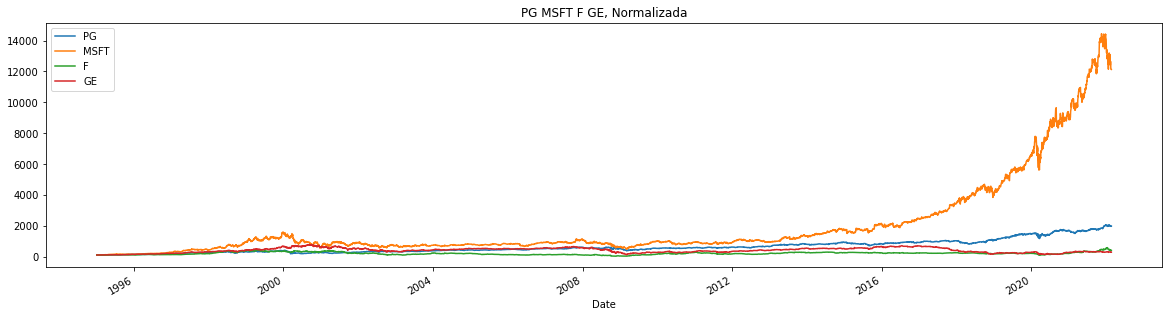

In [12]:
(midata / midata.iloc[0] * 100).plot(figsize=(20,5), title='PG MSFT F GE, Normalizada')
plt.show()

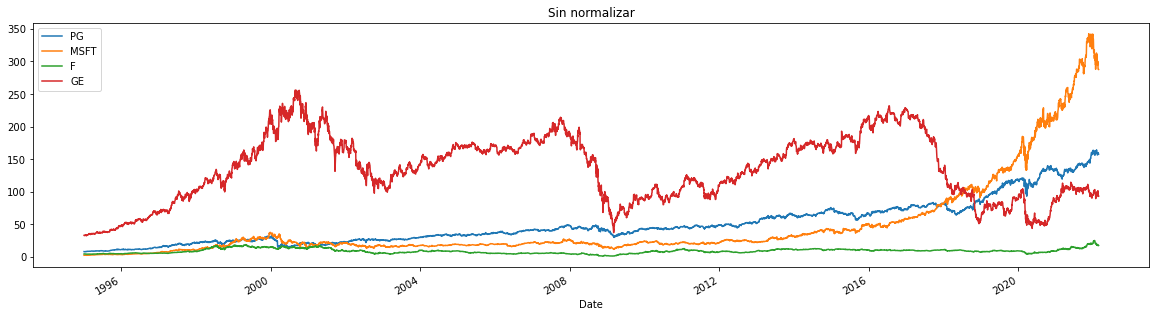

In [13]:
midata.plot(figsize=(20,5), title ='Sin normalizar')
plt.show()

In [15]:
midata.loc['1995-01-03']

PG       7.971119
MSFT     2.369955
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

In [16]:
midata.iloc[0]

PG       7.971119
MSFT     2.369955
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

### Calculando el retorno de un portafolio de activos

In [17]:
retornos = (midata/midata.shift(1))-1
retornos.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [18]:
pesos= np.array([0.25,0.25,0.25,0.25])

In [19]:
np.dot(retornos, pesos)

array([        nan,  0.00653981, -0.0092299 , ..., -0.00980667,
       -0.0097181 , -0.00286094])

In [20]:
retorno_anual = retornos.mean()*250
retorno_anual

PG      0.134160
MSFT    0.224494
F       0.130997
GE      0.089362
dtype: float64

In [21]:
np.dot(retorno_anual, pesos)

0.14475303824152808

In [27]:
portafolio1 = str(round(np.dot(retorno_anual, pesos),5)*100)+' %'
portafolio1

'14.475 %'

In [22]:
pesos_2= np.array([0.4,0.4, 0.15,0.05])

In [31]:
portafolio2= str(round(np.dot(retorno_anual, pesos_2), 5) * 100) + ' %'
print(portafolio2)
print(portafolio1)

16.758 %
14.475 %
